<a href="https://colab.research.google.com/github/ShriNarayanPandey01/DataScience-DeepLearning/blob/main/PreProccessingData/TextPreproccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install "tensorflow-text==2.13.*"

In [9]:
import collections
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_datasets as tfds
import tensorflow_text as tf_text

In [10]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

In [11]:
dataset_dir = utils.get_file(
              origin = data_url,
              untar=True,
              cache_dir = "stack_overflow",
              cache_subdir = ""
            )
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent


/tmp/.keras/stack_overflow_16k


In [12]:
dataset_dir

PosixPath('/tmp/.keras')

In [13]:
list(dataset_dir.iterdir())

[PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 PosixPath('/tmp/.keras/train'),
 PosixPath('/tmp/.keras/README.md')]

[PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 PosixPath('/tmp/.keras/train'),
 PosixPath('/tmp/.keras/README.md')]

In [14]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/javascript')]

[PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/javascript')]

In [15]:
raw_train_ds = utils.text_dataset_from_directory(
                 train_dir,
                 batch_size = 32,
                 seed=40,
                 validation_split=0.2,
                 subset='training',
                )
raw_train_ds

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for text_batch,label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("label:",label_batch.numpy()[i])
    print("text:",text_batch.numpy()[i])

label: 0
text: b"looking for file copy function in blank i'm writing a tool that performs copying from usb devices to the local hd - i wonder if there is a function in blank to copy a file from one path to another?\n"
label: 1
text: b'"truncating a blank stack i have a stack&lt;string&gt; defined in blank that i use for navigation through a workflow. ..what i would like to do is ensure that all values in the stack are unique: when a transition to a ""previous"" state occurs, i want to remove everything off the stack after the first occurrence of the previous state in the stack...is there an easy way to do this?..edit: more information was requested. here\'s an example of the contents of a stack:..[state2, state3, state2, state1, startstate]...i need the ability to accept a string, check the stack and see if there are multiple occurrences of it, then pop elements until the ""bottommost"" occurrence of that string. ""truncate"" was probably a bad description of what i wanted to do... ""p

In [ ]:
raw_train_ds.class_names

['csharp', 'java', 'javascript', 'python']

In [ ]:
raw_validation_ds = utils.text_dataset_from_directory(
                    train_dir,
                    batch_size = 32,
                    seed = 40,
                    validation_split = 0.2,
                    subset = "validation"
                    )
raw_validation_ds

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_dir = dataset_dir/'test'
raw_test_ds = utils.text_dataset_from_directory(
                test_dir,
                batch_size=32
              )
raw_test_ds

Found 8000 files belonging to 4 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
raw_train_ds = raw_train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
raw_validation_ds = raw_validation_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
raw_test_ds = raw_test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
binary_Vector_layer = TextVectorization(
                       max_tokens = 10000,
                       output_mode = 'binary'
                      )
int_vector_layer = TextVectorization(
                     max_tokens = 10000,
                     output_mode = 'int',
                     output_sequence_length = 250
                    )

train_text = raw_train_ds.map(lambda x , y:x)
binary_Vector_layer.adapt(train_text)
int_vector_layer.adapt(train_text)

In [ ]:
for text_batch,lable_batch in raw_train_ds.take(1):
  question=text_batch[0]
  label=label_batch[0]
  print(question)
  print(label)

tf.Tensor(b'"add elements to arraylist<arraylist<string>> i have an arraylist of arraylist. how can i add an element to the list in specific position? ..example: ..arraylist&lt;arraylist&lt;string&gt;&gt;=new arraylist&lt;&gt;(list,list2,.....,listn);...i want to add an element to list2 for example."\n', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
print(list(binary_Vector_layer(question).numpy()))

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(list(int_vector_layer(question).numpy()))

[118, 319, 4, 1, 3, 17, 31, 610, 9, 610, 25, 35, 3, 118, 31, 242, 4, 2, 55, 7, 328, 343, 139, 1, 1, 43, 4, 118, 31, 242, 4, 2602, 12, 139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


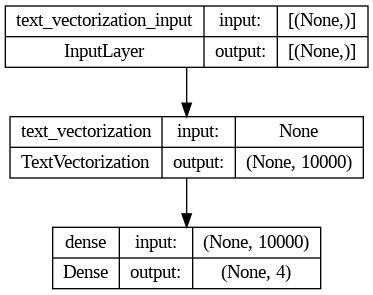

In [ ]:
binary_model = tf.keras.Sequential(
    [binary_Vector_layer,
    layers.Dense(4)]
)
binary_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
    optimizer = 'adam'
)
tf.keras.utils.plot_model(binary_model, show_shapes=True)

In [ ]:
binary_history = binary_model.fit(raw_train_ds , validation_data = raw_validation_ds , epochs=10)

Epoch 1/10
200/200 [==============================] - 3s 9ms/step - loss: 1.1142 - accuracy: 0.6547 - val_loss: 0.9271 - val_accuracy: 0.7456
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.7752 - accuracy: 0.8269 - val_loss: 0.7642 - val_accuracy: 0.7800
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6240 - accuracy: 0.8652 - val_loss: 0.6799 - val_accuracy: 0.7950
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.5305 - accuracy: 0.8919 - val_loss: 0.6279 - val_accuracy: 0.7969
Epoch 5/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4646 - accuracy: 0.9094 - val_loss: 0.5928 - val_accuracy: 0.8019
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4144 - accuracy: 0.9214 - val_loss: 0.5676 - val_accuracy: 0.8044
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.3744 - accuracy: 0.9308 - val_loss: 0.5488 - val_accuracy: 0.8094
E

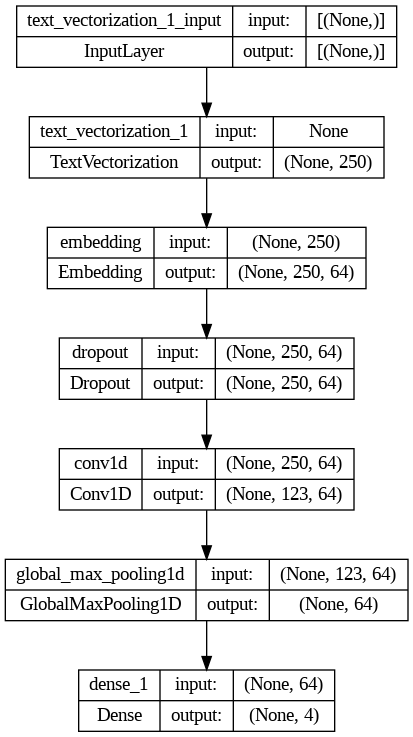

In [ ]:
int_model = tf.keras.Sequential([
    int_vector_layer,
    layers.Embedding(10001 , 64 , mask_zero=True),
    layers.Dropout(0.5),
    layers.Conv1D(64,5,padding='valid',activation= "relu",strides=2),
    layers.GlobalMaxPool1D(),
    layers.Dense(4)
])
tf.keras.utils.plot_model(int_model, show_shapes=True)


In [ ]:
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
    optimizer = 'adam'
)
int_model.fit(raw_train_ds, validation_data = raw_validation_ds,epochs = 10 )

Epoch 1/10
200/200 [==============================] - 9s 43ms/step - loss: 1.2479 - accuracy: 0.4347 - val_loss: 0.9394 - val_accuracy: 0.5913
Epoch 2/10
200/200 [==============================] - 6s 30ms/step - loss: 0.7812 - accuracy: 0.6755 - val_loss: 0.6618 - val_accuracy: 0.7331
Epoch 3/10
200/200 [==============================] - 6s 31ms/step - loss: 0.5685 - accuracy: 0.7873 - val_loss: 0.5621 - val_accuracy: 0.7775
Epoch 4/10
200/200 [==============================] - 7s 34ms/step - loss: 0.4198 - accuracy: 0.8545 - val_loss: 0.5303 - val_accuracy: 0.7962
Epoch 5/10
200/200 [==============================] - 8s 41ms/step - loss: 0.3091 - accuracy: 0.9014 - val_loss: 0.5281 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 7s 37ms/step - loss: 0.2241 - accuracy: 0.9336 - val_loss: 0.5411 - val_accuracy: 0.8037
Epoch 7/10
200/200 [==============================] - 7s 33ms/step - loss: 0.1574 - accuracy: 0.9597 - val_loss: 0.5652 - val_accuracy: 0.8025

In [ ]:
binary_model.predict(['How do you sort a list?'])

1/1 [==============================] - 0s 148ms/step


array([[-0.13349195, -0.02932171, -0.6419958 ,  0.45794782]],
      dtype=float32)

In [ ]:
int_model.predict(['How do you sort a list?'])

1/1 [==============================] - 0s 143ms/step


array([[-0.1454971 ,  0.14844742, -0.4453861 ,  0.33332416]],
      dtype=float32)

Now we will try to find translator of given text among several translators


In [ ]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt']

In [ ]:
for name in FILE_NAMES:
  text_dir = utils.get_file(name , origin = DIRECTORY_URL+name)
parent_dir = pathlib.Path(text_dir).parent
list(parent_dir.iterdir())

807992/807992 [==============================] - 0s 0us/step


[PosixPath('/root/.keras/datasets/derby.txt'),
 PosixPath('/root/.keras/datasets/cowper.txt'),
 PosixPath('/root/.keras/datasets/butler.txt')]

In [ ]:
def labeler(example , i):
  return example ,tf.cast(i,tf.int64)
labeled_datasets = []
for i,files in enumerate(FILE_NAMES):
  line_dataset = tf.data.TextLineDataset(str(parent_dir/files))
  labeled_data = line_dataset.map(lambda  x : labeler(x,i))
  labeled_datasets.append(labeled_data)



In [ ]:
all_labeled_dataset = labeled_datasets[0]
for labeled in labeled_datasets[1:]:
  all_labeled_dataset = all_labeled_dataset.concatenate(labeled)
all_labeled_dataset = all_labeled_dataset.shuffle(50000,reshuffle_each_iteration = False)

In [ ]:
for text , label in all_labeled_dataset.take(10):
  print(text.numpy())
  print(label.numpy())

b'just as he was turning in flight; it struck him between the shoulders'
2
b'To Ilium sent, to join the war of Troy.'
1
b'Unerring, smote the centre of the shield'
0
b'he did not leave off fighting, but aimed his spear at Alcmaon the son'
2
b'With glittering tin; a precious gift, and rare.'
0
b'Hear yet again, and grant what now I ask;'
1
b"With anchors safely, till o'ershadowing night"
0
b"O'er feeble women, whom thou wilt, to slay,"
1
b'fellow lay, sleeping a sleep as it were of bronze, killed in the'
2
b'other with his bow and arrow. The son of Priam hit the breastplate of'
2


In [ ]:
class MyTokenizer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
    self.tokenizer = tf_text.UnicodeScriptTokenizer()
  def call(self,text):
    lowercase = tf_text.case_fold_utf8(text)
    result = self.tokenizer.tokenize(lowercase)
    if isinstance(result ,tf.RaggedTensor):
      result= result.to_tensor()
    return result


In [ ]:
tokenizer = MyTokenizer()
tokenized_ds = all_labeled_dataset.map(lambda x,y:(tokenizer(x),y))

In [ ]:
for tokens , label in tokenized_ds.take(1):
  print(tokens)
  print(label)
  break

tf.Tensor(
[b'just' b'as' b'he' b'was' b'turning' b'in' b'flight' b';' b'it'
 b'struck' b'him' b'between' b'the' b'shoulders'], shape=(14,), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)


In [ ]:
tokenized_ds = tokenized_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
vocab_count = collections.Counter()
for toks , labels in tokenized_ds.ragged_batch(1000):
  toks = tf.reshape(toks,[-1])
  for tok in toks.numpy():
    vocab_count[tok]+=1

vocab = [tok for tok , count in vocab_count.most_common(10000)]
print(vocab[:5])

[b',', b'the', b'and', b"'", b'of']


In [ ]:
class MyVocabTable(tf.keras.layers.Layer):
  def __init__(self, vocab):
    super().__init__()
    self.keys = [''] + vocab
    self.values = range(len(self.keys))

    self.init = tf.lookup.KeyValueTensorInitializer(
        self.keys, self.values, key_dtype=tf.string, value_dtype=tf.int64)

    num_oov_buckets = 1

    self.table = tf.lookup.StaticVocabularyTable(self.init, num_oov_buckets)

  def call(self, x):
    result = self.table.lookup(x)
    return result

In [ ]:
vocab_table=MyVocabTable(vocab)
preprocess_text = tf.keras.Sequential(
    [
        tokenizer,
        vocab_table
    ]
)

In [ ]:
for text ,label in  all_labeled_dataset.take(1):
  print(text.numpy())
  print(preprocess_text(text).numpy())

b'just as he was turning in flight; it struck him between the shoulders'
[632  24  11  35 953  12 330   9  34 210  15 323   2 445]


In [ ]:
all_encoded_data = all_labeled_dataset.map(lambda x,y:(preprocess_text(x),y))
for encText , encLabel in all_encoded_data.take(1):
  print(encText.numpy())
  print(encLabel.numpy())

[632  24  11  35 953  12 330   9  34 210  15 323   2 445]
2


In [ ]:
train_data = all_encoded_data.skip(5000).shuffle(50000).padded_batch(64)
validation_data = all_encoded_data.take(5000).padded_batch(64)

In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    layers.Embedding(10002,64,mask_zero=True),
    layers.Dropout(0.5),
    layers.Conv1D(65,5,padding='valid',activation='relu',strides=2),
    layers.GlobalMaxPooling1D(),
    layers.Dense(3)
])
model.compile(
    optimizer = 'adam',
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_data, validation_data=validation_data, epochs=3)

Epoch 1/3
697/697 [==============================] - 55s 24ms/step - loss: 0.5763 - accuracy: 0.7418 - val_loss: 0.3809 - val_accuracy: 0.8420
Epoch 2/3
697/697 [==============================] - 58s 30ms/step - loss: 0.3593 - accuracy: 0.8518 - val_loss: 0.3422 - val_accuracy: 0.8562
Epoch 3/3
697/697 [==============================] - 55s 24ms/step - loss: 0.2908 - accuracy: 0.8830 - val_loss: 0.3360 - val_accuracy: 0.8614


In [ ]:
metrics = model.evaluate(validation_data, return_dict=True)

print("Loss: ", metrics['loss'])
print("Accuracy: {:2.2%}".format(metrics['accuracy']))

79/79 [==============================] - 7s 49ms/step - loss: 0.3360 - accuracy: 0.8614
Loss:  0.3360433280467987
Accuracy: 86.14%
